In [101]:
def qZ(x, y):
    return ((x - 3 * y + 1)/(3 * x**2 + y**2 + 1))

In [102]:
def qSumZ(Z):
    return sum(Z)

In [103]:
def exchangeScheme(oldX, oldY, sortedId):
    X = [0 for i in range(4)]
    Y = [0 for i in range(4)]

    X[2] = oldX[sortedId[2]]
    X[3] = oldX[sortedId[2]]

    X[0] = oldX[sortedId[0]]

    X[1] = oldX[sortedId[1]]

    Y[0] = oldY[sortedId[2]]
    Y[1] = oldY[sortedId[2]]

    Y[2] = oldY[sortedId[0]]
    Y[3] = oldY[sortedId[1]]

    return X, Y

In [104]:
def sorting(Z):
    sortedId = sorted(range(len(Z)), key = lambda k: Z[k])
    return sortedId

In [105]:
def evoStep(X, Y, Z):
    _, minId = min((value, id) for (id, value) in enumerate(Z))
    X = X[:]
    Y = Y[:]
    Z = Z[:]

    X.pop(minId)
    Y.pop(minId)
    Z.pop(minId)

    return X, Y, Z

In [106]:
def evoSteps(X, Y, stepsNum = 4):
    results = []

    for i in range(4):
        arrZ = [qZ(x, Y[i]) for i, x in enumerate(X)]

        X, Y, Z = evoStep(X,Y, arrZ)
        X, Y = exchangeScheme(X, Y, sorting(Z))
        results.append([X, Y, qSumZ(arrZ), arrZ])

    return X, Y, results

In [107]:
X = [-2, -1, 0, 2]
Y = [-2, 0, -1, 1]
results = evoSteps(X, Y)

In [135]:
for i in range(len(results[2])):
    print(f'max_{i+1}_step: {results[2][i][2]}')

qualityArrZ = []
for i in range(len(results[2])):
    qualityArrZ.append(results[2][i][2])
print(f'max Z:          {max(qualityArrZ)}')

max_1_step: 2.2941176470588234
max_2_step: 0.9714285714285713
max_3_step: 4.823529411764706
max_4_step: 5.828571428571428
max Z:          5.828571428571428


*2 Задание*

In [109]:
import networkx as nx
import random
import numpy as np
from math import e

In [110]:
G = nx.complete_graph(6)

distances = [
    (1, 2, 18),
    (1, 3, 41),
    (1, 4, 36),
    (1, 5, 29),
    (1, 6, 19),
    (2, 3, 32),
    (2, 4, 50),
    (2, 5, 40),
    (2, 6, 34),
    (3, 4, 35), 
    (3, 5, 42),
    (3, 6, 29), 
    (4, 5, 21),
    (4, 6, 35),
    (5, 6, 24)]

In [111]:
V = [1, 3, 4, 5, 6, 2, 1]
Z = [
    (2, 4),
    (3, 4),
    (4, 6),
    (5, 6)
]
P = [63,49,45,53]

T = 100

In [112]:
def probability(delta, T):
    return 100 * e ** (-delta / T)

def reductTemp(prevT):
    nextT = 0.5 * prevT

    return nextT

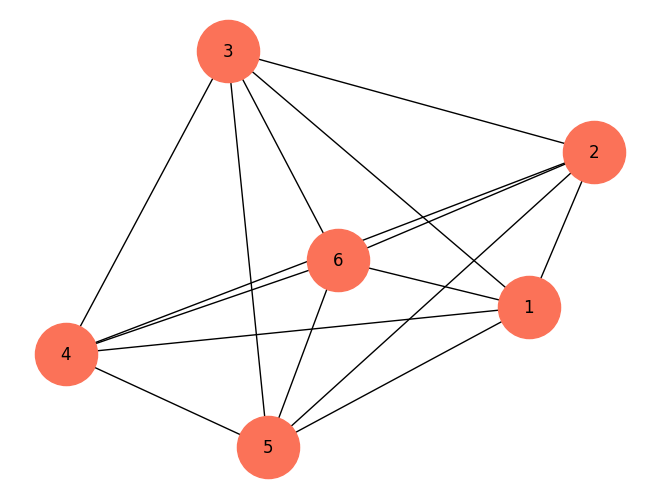

In [113]:
graph = nx.Graph()
graph.add_weighted_edges_from(distances)

nx.draw_kamada_kawai(graph, node_color = "#fb7258", node_size = 2000, with_labels = True)

In [114]:
def edgeLength(i, j, distances, roundTrip = True):
    if roundTrip:
        return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1) for item in distances])

In [115]:
def routeLength(V, distances):
    edges = []
    
    for i in range(len(V) - 1):
        edges.append(edgeLength(V[i], V[i+1], distances))

    return sum(edges)   

In [116]:
def routeOneReplacement(arrV, Z, replacementByName = True):
    decrement = 1 if replacementByName else 0

    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]

    return arrV

In [117]:
def routeReplacement(V, Z):
    for z in Z:
        V = routeOneReplacement(V, z)
    return V

In [143]:
def chooseRoute(distances, V, Z, T, P):
    sumLength = routeLength(V, distances)
    arrSum = [sumLength]

    for i in range(len(Z)):
        newV = routeOneReplacement(V[:], Z[i])
        newS = routeLength(newV, distances)
        arrSum.append(newS)
        deltaS = newS - sumLength

        if newS < sumLength or (deltaS > 0 and probability(deltaS, T) > P[i]):
            V = newV
            sumLength = newS
            
        T = reductTemp(T)
        T = reductTemp(T)
        
    return V, arrSum

In [144]:
def drawRouteGraph(distances, best_cycle):
    newDistances = []
    for i in range(len(best_cycle) - 1):
        for distance in distances:
            if distance[0] == best_cycle[i] and distance[1] == best_cycle[i + 1] or distance[1] == best_cycle[i] and distance[0] == best_cycle[i + 1]:
                newDistances.append(distance)
    graph = nx.Graph()
    graph.add_weighted_edges_from(newDistances)

    nx.draw_kamada_kawai(graph, node_color='#fb7258', node_size = 2000, with_labels = True)

Лучший выбранный маршрут: [1, 5, 4, 3, 6, 2, 1]
Длина лучшего выбранного маршрута: 166
Длины всех рассмотренных маршрутов: [173, 166, 193, 204, 170]


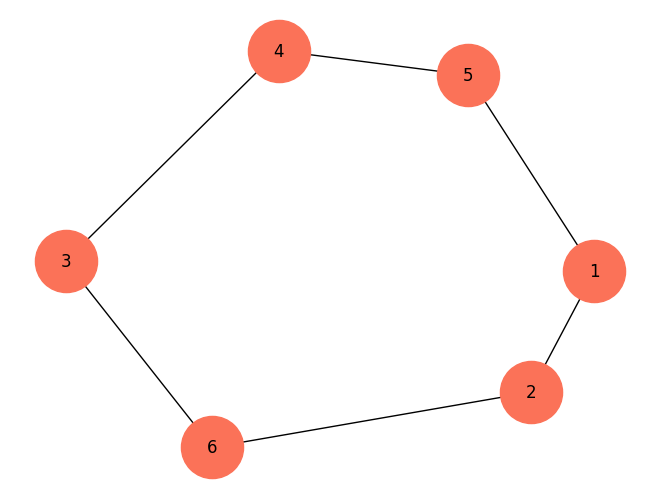

In [145]:
bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)

print(f"Лучший выбранный маршрут: {bestRoute}")
print(f"Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}")
print(f"Длины всех рассмотренных маршрутов: {arrLength}")

drawRouteGraph(distances, bestRoute)